# `whatlies` demo

We're going to understand "what lies" in word embeddings.

In [17]:
%load_ext autoreload
%autoreload 2

In [18]:
from whatlies import Embedding, EmbeddingSet
import matplotlib.pylab as plt

In [19]:
man   = Embedding("man", [0.5, 0.1])
woman = Embedding("woman", [0.5, 0.6])
king  = Embedding("king", [0.7, 0.33])
queen = Embedding("queen", [0.7, 0.9])

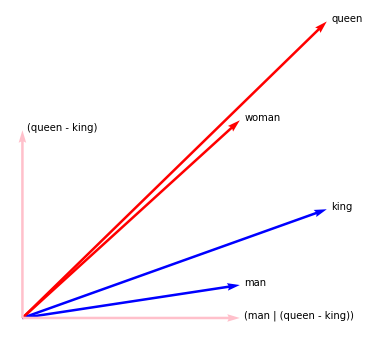

In [20]:
plt.figure(figsize=(6, 6))

man.plot(kind="arrow", color="blue")
woman.plot(kind="arrow", color="red")
king.plot(kind="arrow", color="blue")
queen.plot(kind="arrow", color="red")

(queen - king).plot(kind="arrow", color="pink", show_ops=True)
(man | (queen - king)).plot(kind="arrow", color="pink", show_ops=True)

plt.axis('off');

# Plotting High Dimensions

Note that you need to install the spaCy language model before you can run this. 

```
python -m spacy install en_core_web_md
```

In [21]:
import spacy 
nlp = spacy.load('en_core_web_md')

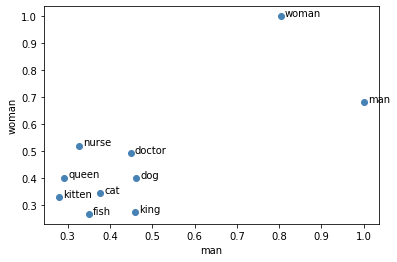

In [22]:
words = ["cat", "dog", "fish", "kitten", "man", "woman", "king", "queen", "doctor", "nurse"]
tokens = {t.text: Embedding(t.text, t.vector) for t in nlp.pipe(words)}

x_axis = tokens['man']
y_axis = tokens['woman']

for name, t in tokens.items():
    t.plot(x_axis=x_axis, y_axis=y_axis).plot(kind="text", x_axis=x_axis, y_axis=y_axis)

# Using Language Backends 

We can manually create embedding sets, but we can also fetch them from a language backend.

In [47]:
from whatlies.language import SpacyLanguage

lang = SpacyLanguage("en_core_web_md")

In [48]:
words = ["prince", "princess", "nurse", "doctor", "banker", "man", "woman",
         "cousin", "neice", "king", "queen", "dude", "guy", "gal", "fire",
         "dog", "cat", "mouse", "red", "bluee", "green", "yellow", "water",
         "person", "family", "brother", "sister"]

emb = lang[words]

In [49]:
from whatlies.transformers import Pca, Umap

words1 = ["dog", "cat", "mouse", "deer", "elephant", "zebra", "fish", "rabbit", "rat", 
          "tomato", "banana", "coffee", "tea", "apple", "union"]

words2 = ["run", "swim", "dance", "sit", "eat", "hear", "look", "run", "stand"]

In [50]:
umap = Umap(2)

In [51]:
lang[words1].transform(umap).embeddings.keys()

dict_keys(['dog', 'cat', 'mouse', 'deer', 'elephant', 'zebra', 'fish', 'rabbit', 'rat', 'tomato', 'banana', 'coffee', 'tea', 'apple', 'union', 'umap_0', 'umap_1'])

In [52]:
emb1 = lang[words1].transform(umap).add_property('group', lambda d: 'group-one')
emb2 = lang[words2].transform(umap).add_property('group', lambda d: 'group-two')
both = emb1.merge(emb2)

both.plot_interactive('umap_0', 'umap_1', color='group')

alt.LayerChart(...)